### Раскомментить и установить расширение

In [1]:
# pip install ifcopenshell 


In [2]:
# pip install Pillow

In [3]:
# pip install nbformat

In [4]:
# pip install plotly 

In [5]:
# pip install seaborn

In [6]:
# pip install pandas

In [7]:
# pip install lark

# Исполняемый код

In [8]:
import ifcopenshell
import pandas as pd

No stream support: No module named 'lark'
/var/folders/rn/rl1dzql55sd8tt1fhxq5dlzm0000gn/T/ipykernel_33325/333723811.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [36]:
def extract_ifc_properties_to_dataframe(ifc_path, object_type, properties_list) -> pd.DataFrame: 
    # Загрузка IFC файла
    file = ifcopenshell.open(ifc_path)
    
    # Получение всех объектов заданного типа
    objects = file.by_type(object_type)
    
    # Подготовка данных для DataFrame (pandas)
    data = []

    # print(objects[0].get_info())

    for obj in objects:
        obj_data = {'GlobalId': obj.GlobalId, 'obj_type': obj.get_info()['type']}
        for property_set in obj.IsDefinedBy:
            if property_set.is_a('IfcRelDefinesByProperties'):
                property_set_definition = property_set.RelatingPropertyDefinition
                if property_set_definition.is_a('IfcPropertySet'):
                    for (pset_name, prop_name) in properties_list:
                        if property_set_definition.Name == pset_name:
                            for property in property_set_definition.HasProperties:
                                if property.Name == prop_name and property.is_a('IfcPropertySingleValue'):
                                    # Добавляем значение свойства в данные объекта
                                    if property.NominalValue != None:
                                        obj_data[f'{pset_name}.{prop_name}'] = property.NominalValue.wrappedValue
        data.append(obj_data)

    # Создание DataFrame
    df = pd.DataFrame(data)
    df.set_index('GlobalId', inplace=True)
    
    return df

def extract_pset_data(prefix: str, property_set_definition, obj_data: dict):
    if property_set_definition.is_a('IfcPropertySet'):     
        for property in property_set_definition.HasProperties:
            if property.is_a('IfcPropertySingleValue'):
                # Добавляем значение свойства в данные объекта
                if property.NominalValue != None:
                    obj_data[f'{prefix}{property_set_definition.Name}.{property.Name}'] = property.NominalValue.wrappedValue
                  

def extract_ifc_properties_list(
    ifc_path: str, 
    object_types: list[str], 
    provide_type_props: bool) -> pd.DataFrame: 
    # Загрузка IFC файла
    file = ifcopenshell.open(ifc_path)
    
    # Подготовка данных для DataFrame (pandas)
    data = []
    
    for object_type in object_types:
        # Получение всех объектов заданного типа
        objects = file.by_type(object_type)
        

        # print(objects[0].get_info())
        oo = objects[0]

        for obj in objects:
            obj_data = {'GlobalId': obj.GlobalId, 'obj_type': obj.get_info()['type']}
            if provide_type_props:
                for obj_type in obj.IsTypedBy:
                    if obj_type.RelatingType:
                        for property_set_definition in obj_type.RelatingType.HasPropertySets:
                            extract_pset_data('Type.', property_set_definition, obj_data)
            
            сс = obj.get_info()
            # for rel_def_bty_type in obj
            for property_set in obj.IsDefinedBy:       
                # print(property_set)
                # if property_set.is_a('IFCRELDEFINESBYTYPE'):
                #     print(property_set)
                if property_set.is_a('IfcRelDefinesByProperties'):
                    property_set_definition = property_set.RelatingPropertyDefinition                
                    extract_pset_data('Element.', property_set_definition, obj_data)

            data.append(obj_data)

    # Создание DataFrame
    df = pd.DataFrame(data)
    df.set_index('GlobalId', inplace=True)
        
    return df


In [37]:
# Пример использования функции
ifc_path = 'Ifc4_Revit_ARC.ifc'
object_types = [ 'IfcWall']
# IfcRailing
# Кортеж из интересующих ('propertyset name','property name')
properties_list = [
    ('Tekla Quantity', 'Weight'),
    ('Идентификация', "Категория ТСС"),
    ('Геометрические параметры', 'Высота'),
    ('Геометрические параметры', 'Длина'),
    ('Маркировка', 'Сечение в каталоге Tekla')
]

provide_type_props = True

df_list_all = extract_ifc_properties_list(ifc_path, object_types, provide_type_props)
df_list_all

,obj_type,Type.Pset_EnvironmentalImpactIndicators.Reference,Type.Pset_ReinforcementBarPitchOfWall.Description,Type.Pset_ReinforcementBarPitchOfWall.Reference,Type.Pset_WallCommon.IsExternal,Type.Pset_WallCommon.Reference,Type.Pset_WallCommon.ThermalTransmittance,Element.Pset_EnvironmentalImpactIndicators.Reference,Element.Pset_ReinforcementBarPitchOfWall.Description,Element.Pset_ReinforcementBarPitchOfWall.Reference,Element.Pset_WallCommon.LoadBearing,Element.Pset_WallCommon.Reference,Element.Pset_WallCommon.ThermalTransmittance,Element.Pset_WallCommon.IsExternal,Element.Pset_WallCommon.ExtendToStructure,Element.Pset_OpeningElementCommon.Reference
GlobalId,,,,,,,,,,,,,,,,
3lLx0gNe59vvExhby0Bfew,IfcWall,SIP 202mm Wall - conc clad,Structural Insulation Panel Wall with Kiln Dri...,SIP 202mm Wall - conc clad,False,SIP 202mm Wall - conc clad,47.545455,SIP 202mm Wall - conc clad,Structural Insulation Panel Wall with Kiln Dri...,SIP 202mm Wall - conc clad,False,SIP 202mm Wall - conc clad,47.545455,True,False,NaN
3lLx0gNe59vvExhby0Bff1,IfcWall,Wall - Timber Clad,Structural Insulation Panel Wall with Kiln Dri...,Wall - Timber Clad,False,Wall - Timber Clad,NaN,Wall - Timber Clad,Structural Insulation Panel Wall with Kiln Dri...,Wall - Timber Clad,False,Wall - Timber Clad,NaN,True,True,NaN
28i3i5WDD8Ju0YHnzXOzdu,IfcWall,Wall - Timber Clad,Structural Insulation Panel Wall with Kiln Dri...,Wall - Timber Clad,False,Wall - Timber Clad,NaN,Wall - Timber Clad,Structural Insulation Panel Wall with Kiln Dri...,Wall - Timber Clad,False,Wall - Timber Clad,NaN,True,True,NaN
1oPutv5ADAxgWEbAZbN6Wv,IfcWall,Wall - Timber Clad,Structural Insulation Panel Wall with Kiln Dri...,Wall - Timber Clad,False,Wall - Timber Clad,NaN,Wall - Timber Clad,Structural Insulation Panel Wall with Kiln Dri...,Wall - Timber Clad,False,Wall - Timber Clad,NaN,True,False,NaN
1PDnLIM013wvkZO9Lb4$wc,IfcWall,Wall - Timber Clad,Structural Insulation Panel Wall with Kiln Dri...,Wall - Timber Clad,False,Wall - Timber Clad,NaN,Wall - Timber Clad,Structural Insulation Panel Wall with Kiln Dri...,Wall - Timber Clad,False,Wall - Timber Clad,NaN,True,False,NaN
1PDnLIM013wvkZO9Lb4$GV,IfcWall,Interior - 165 Partition (1-hr),NaN,Interior - 165 Partition (1-hr),False,Interior - 165 Partition (1-hr),NaN,Interior - 165 Partition (1-hr),NaN,Interior - 165 Partition (1-hr),False,Interior - 165 Partition (1-hr),NaN,False,False,NaN
1$p8tACJ938vr1_lKOJJ0t,IfcWall,Interior - 165 Partition (1-hr),NaN,Interior - 165 Partition (1-hr),False,Interior - 165 Partition (1-hr),NaN,Interior - 165 Partition (1-hr),NaN,Interior - 165 Partition (1-hr),False,Interior - 165 Partition (1-hr),NaN,False,False,NaN
38NblWsDL1I8DljLvn67Sd,IfcWall,Wall - Timber Clad,Structural Insulation Panel Wall with Kiln Dri...,Wall - Timber Clad,False,Wall - Timber Clad,NaN,Wall - Timber Clad,Structural Insulation Panel Wall with Kiln Dri...,Wall - Timber Clad,False,Wall - Timber Clad,NaN,True,False,NaN
38NblWsDL1I8DljLvn67bV,IfcWall,SIP 202mm Wall - conc clad,Structural Insulation Panel Wall with Kiln Dri...,SIP 202mm Wall - conc clad,False,SIP 202mm Wall - conc clad,47.545455,SIP 202mm Wall - conc clad,Structural Insulation Panel Wall with Kiln Dri...,SIP 202mm Wall - conc clad,False,SIP 202mm Wall - conc clad,47.545455,True,False,NaN


In [38]:
df = extract_ifc_properties_to_dataframe(ifc_path, object_types, properties_list)
df.obj_type.value_counts()

TypeError: Wrong number or type of arguments for overloaded function 'file_by_type'.
  Possible C/C++ prototypes are:
    IfcParse::IfcFile::instances_by_type(IfcParse::declaration const *)
    IfcParse::IfcFile::instances_by_type(std::string const &)


In [32]:
df.loc[:,'obj_type'].value_counts()

obj_type
IfcDoor    16
Name: count, dtype: int64

In [25]:
df.loc[df['obj_type'] == 'IfcBeam',['obj_type','Маркировка.Сечение в каталоге Tekla']]

,obj_type,Маркировка.Сечение в каталоге Tekla
GlobalId,,
0cryUIbA55I9w6zXlNGfwV,IfcBeam,U16P_8240_97
0JG_ZbA9T1Q8XB5M4qoezx,IfcBeam,U16P_8240_97
0D$inzAnnDXvy7fR5jDtv5,IfcBeam,PK80X5.0_32931_2015
0pkwX3ikD4_efCR4HnegNh,IfcBeam,PK80X5.0_32931_2015
3Ng8LAREv6BABhOPewuZKz,IfcBeam,PK80X5.0_32931_2015
...,...,...
2JPJHsQLT1zOPsMqvJDdo9,IfcBeam,U16P_8240_97
3NKQ$V9k1F3gAKixq4dbqM,IfcBeam,I30H2_57837_2017
131ujOmhvA8QUlDsviILBl,IfcBeam,U20P_8240_97


In [22]:
df.describe()

,Геометрические параметры.Высота,Геометрические параметры.Длина,Tekla Quantity.Weight
count,1304.000000,1304.000000,2054.000000
mean,108.114110,2247.817945,42.984031
std,78.078829,3849.917313,175.127039
min,24.000000,12.000000,0.000000
25%,55.000000,500.000000,1.000000
50%,80.000000,1351.800000,11.280000
75%,160.000000,3149.000000,23.030000
max,800.000000,42740.900000,3200.000000


In [ ]:
# pip install nbformat

  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.33.0-py3-none-any.whl.metadata (2.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 857.3 kB/s eta 0:00:000:00:01
Using cached jsonschema-4.21.1-py3-none-any.whl (85 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cached referencing-0.33.0-py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.0/333.0 kB 1.1 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
df.to_csv('ifc_extracted_data.csv', sep=",")

In [12]:
import plotly.express as px
import seaborn as sns

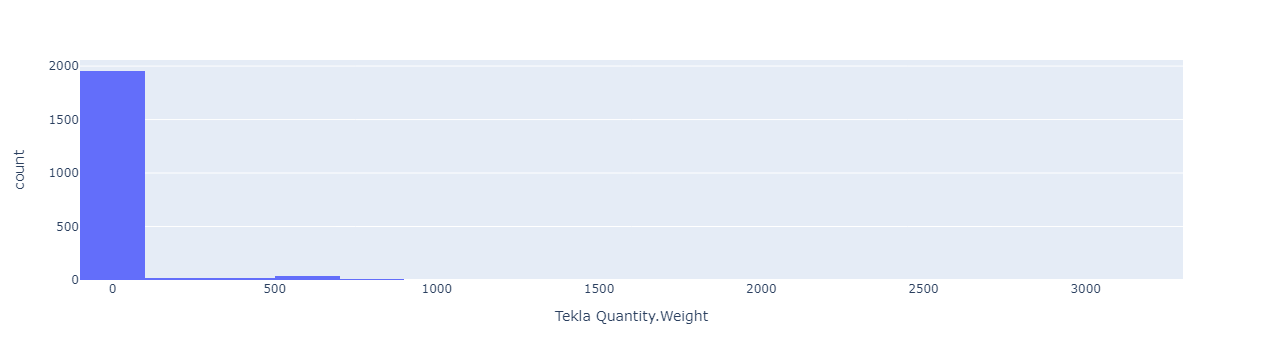

In [31]:
fig = px.histogram(df, x="Tekla Quantity.Weight", nbins=30)
fig.show()

In [11]:

def data_mean():
sample_data = pd.DataFrame({
    'income': df.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [df.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [df.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4
